In [60]:
import math
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

{3: 0.197, 0: 0.118, 2: 0.301, 1: 0.263, 4: 0.092, 5: 0.024, 6: 0.004, 7: 0.001}


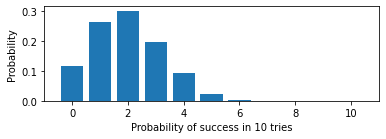

In [61]:
#Exercise 1

p = 0.2
n = 10                      
num_experiments = 1000;     
outcomes = binom.rvs(n,p,size=num_experiments)

counts = collections.Counter(outcomes)
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

print(str(normalized_counts))

plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

In [62]:
#Exercise 2
n = 14                     
num_experiments = 1000; 
prob = np.arange(0, 1, 0.1)
for p in prob:
    outcomes = binom.rvs(n,p,size=num_experiments)
    counts = collections.Counter(outcomes)
    normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

    print(str(normalized_counts))
    

{0: 1.0}
{2: 0.27, 0: 0.226, 1: 0.34, 4: 0.036, 3: 0.124, 5: 0.004}
{3: 0.23, 2: 0.238, 0: 0.047, 5: 0.095, 1: 0.176, 4: 0.161, 6: 0.045, 7: 0.007, 8: 0.001}
{5: 0.193, 6: 0.13, 4: 0.21, 3: 0.189, 2: 0.124, 10: 0.003, 7: 0.071, 8: 0.024, 1: 0.042, 0: 0.01, 9: 0.004}
{9: 0.043, 4: 0.141, 5: 0.204, 8: 0.091, 3: 0.087, 7: 0.147, 6: 0.214, 2: 0.041, 11: 0.01, 1: 0.006, 0: 0.004, 10: 0.011, 12: 0.001}
{7: 0.199, 8: 0.189, 6: 0.189, 5: 0.128, 9: 0.119, 4: 0.061, 11: 0.02, 10: 0.063, 12: 0.007, 3: 0.021, 13: 0.001, 2: 0.002, 1: 0.001}
{9: 0.207, 11: 0.087, 10: 0.153, 13: 0.005, 6: 0.088, 7: 0.157, 8: 0.197, 5: 0.047, 12: 0.034, 4: 0.021, 14: 0.002, 3: 0.001, 1: 0.001}
{11: 0.196, 8: 0.133, 12: 0.102, 10: 0.24, 9: 0.195, 7: 0.071, 6: 0.023, 13: 0.027, 5: 0.009, 14: 0.003, 4: 0.001}
{14: 0.045, 9: 0.084, 11: 0.252, 13: 0.166, 8: 0.023, 12: 0.245, 6: 0.002, 10: 0.173, 7: 0.009, 5: 0.001}
{9: 0.005, 12: 0.253, 11: 0.128, 14: 0.222, 13: 0.347, 10: 0.044, 8: 0.001}


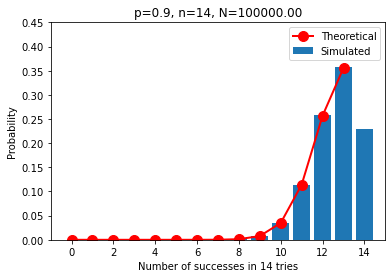

In [63]:
#Exercise 2
n=14
xs = range(0, n)
f = plt.figure()
for p in np.arange(0, 1, 0.1):
    # Get the true binomial pdf
    Y = binom.pmf(xs,n,p)

    # Get the random picks, make histogram and normalize
    counts = collections.Counter(binom.rvs(n,p,size=int(N)))
    normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

    # Show both
    plt.bar(normalized_counts.keys(), normalized_counts.values())
    plt.plot(xs, Y, 'ro-', linewidth=2, markersize=10)
        
    # Labels, etc
    plt.title(f'p={p:.1f}, n={n}, N={N:.2f}')
    plt.xlabel(f'Number of successes in {n} tries')
    plt.ylabel('Probability')
    plt.axis([-1, n+1, 0, 0.45])
    plt.legend(('Theoretical', 'Simulated'))
    plt.show()

    # Wait
    time.sleep(1)

    # Clear for next plot
    clear_output(wait=True)

{5: 0.038, 7: 0.148, 11: 0.098, 10: 0.151, 13: 0.006, 9: 0.212, 8: 0.206, 6: 0.086, 14: 0.003, 12: 0.038, 4: 0.01, 3: 0.004}


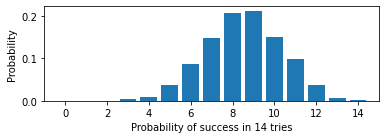

In [64]:
#Exercise 2 - Answer is p=0.6
p = 0.6
n = 14                     
num_experiments = 1000;     
outcomes = binom.rvs(n,p,size=num_experiments)

counts = collections.Counter(outcomes)
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

print(str(normalized_counts))

plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

The Probability is 1.2378187214998254e-07
The Log Probability is -15.90474491593149


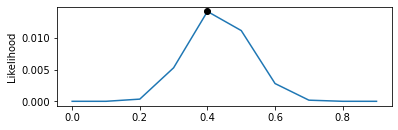

/var/folders/2h/mpl_tcy550sc63l7xlk3qj7r0000gq/T/ipykernel_2907/1193903437.py:26: RuntimeWarning: divide by zero encountered in log
  log_likelihood_function = np.sum(np.log(probs),1);


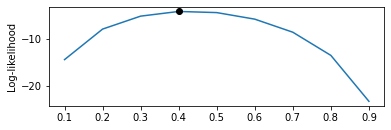

In [83]:
#Exercise 3
prob_8 = binom.pmf(8, 14, 0.1) 
prob_4 = binom.pmf(5, 14, 0.1) 
prob_both = prob_8 * prob_4
log_prob = np.log(prob_8) + np.log(prob_4) 
print('The Probability is ' +str(prob_both))
print('The Log Probability is ' +str(log_prob))

#full likelihood and log-likelihood functions
ps = np.arange(0, 1, 0.1)      
probs = binom.pmf(matlib.repmat([8, 4], ps.size, 1), 
                  matlib.repmat([14, 14], ps.size, 1), 
                  matlib.repmat(np.asmatrix(ps).T, 1, 2))

plt.subplot(211)
plt.ylabel('Likelihood')
likelihood_function = np.prod(probs,1)          
plt.plot(ps, likelihood_function)               
max_likelihood = np.amax(likelihood_function)   
plt.plot(ps[likelihood_function==max_likelihood], max_likelihood, 'ko')
plt.show()


plt.subplot(212)
plt.ylabel('Log-likelihood')
log_likelihood_function = np.sum(np.log(probs),1); 
plt.plot(ps, log_likelihood_function)               
max_log_likelihood = np.amax(log_likelihood_function)      
plt.plot(ps[log_likelihood_function==max_log_likelihood], max_log_likelihood, 'ko')
plt.show()

In [82]:
#Exercise 4
counts = [0, 0, 3, 10, 19, 26, 16, 16, 5, 5, 0, 0, 0, 0, 0] 
n = len(counts)-1              
ks = np.arange(n+1)             
ps = np.arange(0, 1.01, 0.01)  

probs = binom.pmf(matlib.repmat(ks, ps.size, 1), n, matlib.repmat(np.asmatrix(ps).T, 1, ks.size))
counts_matrix = matlib.repmat(counts, ps.size, 1)

 
likelihood_fcn = np.prod(probs ** counts_matrix, axis=1)
p_hat_from_liklihood = ps[np.argmax(likelihood_fcn)]


probs[probs<0.0001]=0.0001
log_likelihood_fcn = np.sum(np.log(probs) * counts_matrix, axis=1)
p_hat_from_log_likelihood = ps[np.argmax(log_likelihood_fcn)]

p_true = np.sum(counts*ks)/(np.sum(counts)*n)
print('Likelihood is '+ str(p_hat_from_liklihood))
print('Log Likelihood is '+ str(p_hat_from_log_likelihood))
print('True Value is '+ str(p_true))


Likelihood is 0.38
Log Likelihood is 0.38
True Value is 0.3821428571428571


In [72]:
#Exercise 5

p_value = st.binom_test(7, 14, 0.3, alternative='greater')    

print(p_value)

#Not statistically significant 

0.09328189116275992
